# Projeto 1

Fabio Scala Cattini Maluf ENG2B

Pergunta:
Países com alto IDH, consequentemente apresentarão grandes territórios de áreas urbanas?
Países com baixo IDH, consequentemente apresentarão baixas porcentagem de vacinação de DTP3?



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
idh = pd.read_excel("hdi_human_development_index.xlsx")
area = pd.read_excel("agricultural_land_percent_of_land_area.xlsx")
vac = pd.read_excel("dtp3_immunized_percent_of_one_year_olds.xlsx")

In [3]:
idh_index = idh.set_index('geo')
area_index = area.set_index('geo')
vac_index = vac.set_index('geo')
   
IDH = idh_index[[1990, 2000, 2010]]
area_rural = area_index[[1990, 2000, 2010]]
vacinacao = vac_index[[1990, 2000, 2010]]


In [4]:
df = vacinacao.join(area_rural, how='inner', lsuffix='_vac', rsuffix='_area')
data = df.join(IDH, how="inner")
data.to_csv('IDH_AreaRural_Vac', index=True)

In [5]:
data = data.dropna()


In [6]:
faixas = [0, 0.555, 0.699, 0.799, 1]
idh_1990_disc = pd.cut(data[1990], bins = faixas)
idh_2000_disc = pd.cut(data[2000], bins = faixas)
idh_2010_disc = pd.cut(data[2010], bins = faixas )

data['1990_idh'] = idh_1990_disc
data['2000_idh'] = idh_2000_disc
data['2010_idh'] = idh_2010_disc

data['1990_idh'].cat.categories = ('Baixo', 'Médio', 'Alto', 'Muito Alto')
data['2000_idh'].cat.categories = ('Baixo', 'Médio', 'Alto', 'Muito Alto')
data['2010_idh'].cat.categories = ('Baixo', 'Médio', 'Alto', 'Muito Alto')

data.head()

,1990_vac,2000_vac,2010_vac,1990_area,2000_area,2010_area,1990,2000,2010,1990_idh,2000_idh,2010_idh
geo,,,,,,,,,,,,
Afghanistan,25.0,24.0,66.0,58.3,57.8,58.1,0.295,0.340,0.454,Baixo,Baixo,Baixo
Albania,94.0,97.0,99.0,40.9,41.8,43.8,0.635,0.662,0.738,Médio,Médio,Alto
Algeria,89.0,86.0,95.0,16.2,16.8,17.4,0.577,0.644,0.724,Médio,Médio,Alto
Argentina,87.0,83.0,94.0,46.6,47.0,53.9,0.705,0.771,0.816,Alto,Alto,Muito Alto
Australia,95.0,90.0,92.0,60.5,59.3,51.9,0.866,0.899,0.927,Muito Alto,Muito Alto,Muito Alto


# Cruzando as variáveis 
Incialmente vamos cruzar o IDH com a porcentagem do país que é considerada como área rural, com o gráfico plotado vamos adicionar uma reta de corrrelação dos dados que tenta mostrar como essa relação se comporta, e ao final mostrar qual a correlação entre as duas variáveis. E o mesmo será feito para IDH ea taxa de vacinação de DTP3 em cada país que está sendoa analisado.  


In [7]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='red')
    

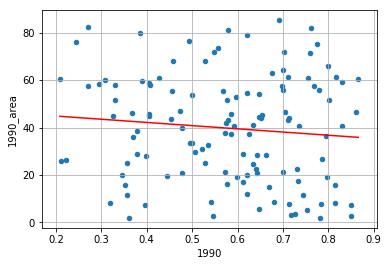

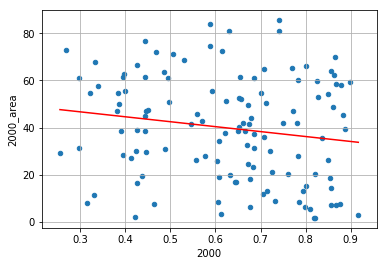

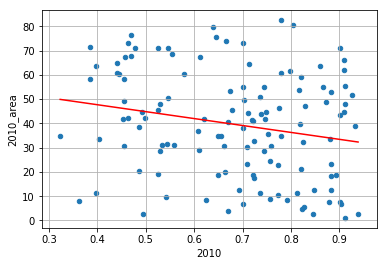

1990 = -0.10205681597355964; 2000 = -0.1667320540143426/; 2010 = -0.21204613490203775


In [8]:
data.plot.scatter(x=1990,y='1990_area');
reta(data[1990], data['1990_area'])
plt.grid()
plt.show()
data[1990].corr(data['1990_area'])

data.plot.scatter(x=2000,y='2000_area');
reta(data[2000], data['2000_area'])
plt.grid()
plt.show()

data.plot.scatter(x=2010,y='2010_area');
reta(data[2010], data['2010_area'])
plt.grid()
plt.show()

print('1990 = {0}; 2000 = {1}/; 2010 = {2}'.format(data[1990].corr(data['1990_area']),\
                                                   data[2000].corr(data['2000_area']),data[2010].corr(data['2010_area'])))


In [9]:
data['1990_idh'].value_counts()


Baixo         49
Médio         37
Alto          28
Muito Alto    10
Name: 1990_idh, dtype: int64

In [10]:
data['2000_idh'].value_counts()


Baixo         40
Médio         37
Muito Alto    26
Alto          21
Name: 2000_idh, dtype: int64

In [11]:
data['2010_idh'].value_counts()

Baixo         36
Muito Alto    35
Alto          33
Médio         20
Name: 2010_idh, dtype: int64

In [12]:
data[data['2010_idh'] == 'Muito Alto']

,1990_vac,2000_vac,2010_vac,1990_area,2000_area,2010_area,1990,2000,2010,1990_idh,2000_idh,2010_idh
geo,,,,,,,,,,,,
Argentina,87.0,83.0,94.0,46.60,47.00,53.90,0.705,0.771,0.816,Alto,Alto,Muito Alto
Australia,95.0,90.0,92.0,60.50,59.30,51.90,0.866,0.899,0.927,Muito Alto,Muito Alto,Muito Alto
Austria,90.0,81.0,83.0,36.60,35.60,33.70,0.794,0.837,0.880,Alto,Muito Alto,Muito Alto
Bahrain,94.0,97.0,99.0,11.60,13.00,11.30,0.745,0.794,0.812,Alto,Alto,Muito Alto
Brunei,93.0,99.0,95.0,2.09,1.90,2.54,0.782,0.819,0.846,Alto,Muito Alto,Muito Alto
Canada,88.0,92.0,95.0,7.45,7.44,6.96,0.849,0.867,0.903,Muito Alto,Muito Alto,Muito Alto
Chile,95.0,91.0,92.0,21.40,20.30,21.20,0.700,0.761,0.820,Alto,Alto,Muito Alto
Cyprus,93.0,97.0,99.0,17.40,15.30,12.40,0.733,0.800,0.847,Alto,Muito Alto,Muito Alto
Denmark,90.0,97.0,90.0,65.80,62.40,61.90,0.799,0.862,0.910,Alto,Muito Alto,Muito Alto


# Conclusões sobre àrea rural 
Ao analisarmos o gráfico de 90 conseguimos ver um a grande distribuição dos pontos com uma reta de tendência pouco inclinada, levando a conclusão que era esperada de uma pequena correlação entre IDH e área urbana, que ainda é comprovada com o valor da correlação que é de -0.1. Após essa análise de 90 vamos para o ano de 2000, que continua com os pontos bem distribuídos por todo o gráfico mas agora com uma reta de tendência um pouco mais inclinada do que no ano de 90, mostranda que no decorrer desses 10 anos tivemos uma maior correlação entre esses dois dados, que são confirmados com um aumento de 60% no valor de correlação que foi para -0.16. Isso ocorre dado um aumento de páises consideredados de IDH muito alto, e destes países há uma maioria com aréas rurais abaixo de 50% chegando na causa desse aumento de 60%. Indo para o ano de 2010 temos mais um aumento no valor de correlação, que chega a -0.21. Mais um aumento consideravél ocasionado da mesma forma para o ano de 2000. Mesmo com esse aumento consideravél de mais de 100% no valor de correlção entre essas variáveis, esse indice é muito baixo levando se a concluir que Países com IDH elevados não necessariamente apresentem uma maior área urbana do que rural


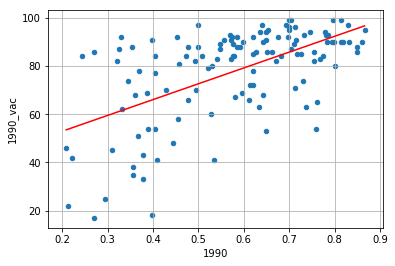

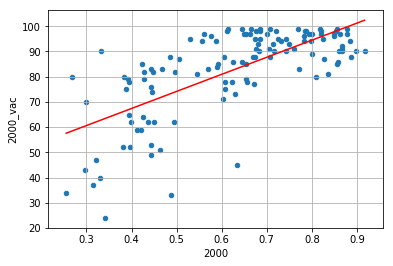

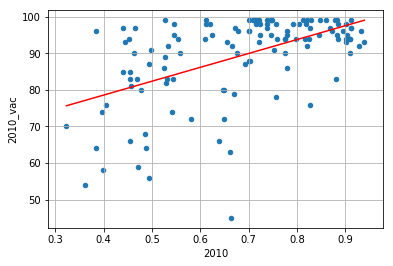

1990 = 0.5804120721819845; 2000 = 0.6944329730581447; 2010 = 0.5295755384530599


In [13]:
data.plot.scatter(x=1990,y='1990_vac');
reta(data[1990], data['1990_vac'])
plt.grid()
plt.show()
data[1990].corr(data['1990_vac'])

data.plot.scatter(x=2000,y='2000_vac');
reta(data[2000], data['2000_vac'])
plt.grid()
plt.show()

data.plot.scatter(x=2010,y='2010_vac');
reta(data[2010], data['2010_vac'])
plt.grid()
plt.show()

print('1990 = {0}; 2000 = {1}; 2010 = {2}'.format(data[1990].corr(data['1990_vac']),\
                                                   data[2000].corr(data['2000_vac']),data[2010].corr(data['2010_vac'])))

In [14]:
data['1990_vac'].describe()

count    124.000000
mean      77.854839
std       19.145440
min       17.000000
25%       69.000000
50%       85.000000
75%       91.000000
max       99.000000
Name: 1990_vac, dtype: float64

In [15]:
data['2000_vac'].describe()

count    124.000000
mean      82.798387
std       17.066574
min       24.000000
25%       78.000000
50%       88.000000
75%       95.250000
max       99.000000
Name: 2000_vac, dtype: float64

In [16]:
data['2010_vac'].describe()

count    124.000000
mean      89.354839
std       11.645993
min       45.000000
25%       85.000000
50%       94.000000
75%       98.000000
max       99.000000
Name: 2010_vac, dtype: float64

# Conclusões sobre vacinação
Analisando os valores de 90 sobre a relação entre IDH e vacinação conseguimos ver uma reta crescente com os países de alto IDH em sua maioria com uma alta porcentagem de vacinação, indo para países com IDH mais baixos, temos uma grande dispersão nos países. Com países com altíssimas taxas de vacinação mas também países com taxas inferiores a 50%. Levando a um avlor de correlação de 0.58. Passando dez anos adiante e chegando no ano de 2000 temos uma maior condesação dos países com alto IDH nas altas taxas de vacinação e poucas condições significativas na dispersão dos páises de IDH baixo levando a uma reta mais inclinada e uma maior correlção entre os dados levando aum idice de 0.7 na correlação entre os dados. Já em 2010 temos um aumento na dispersão dos dados em geral levando a uma taxa de correlação menor ,e inferior a de 1990, 0.52. Com isso conseguimos afirmar que temos uma correlação entre IDH ea taxa de vacinação de DTP3, onde países com maior IDh apresentado maior taxas de vacinação. Mas um ponto interessante é o de que não necessariamente países com baixo IDH apresentam baixas taxas, na verdade muito países apresentam mais de 80% de vacinação e outro fato é o de que com o decorrer dos anos em geral o mundo te aumento sua taxa de vacinação com média e mediana tendo aumentos no decorrer desses 20 anos. Onde a média dos países é de 89% ea mediana é de 94%.